# Nomenclature 

Dans tout le notebook :
    $f$ désignera la fonction dont on cherche à tracer les lignes de niveau,$c \in \mathbb R $ la valeur de la ligne de niveau.
    <br/> En pratique on travaillera avec $c=0$ avec le changement :
    \begin{array}{l|rcl}
     g : & \mathbb R^2 & \longrightarrow & \mathbb R \\
         & x & \longmapsto & f(x) - c\end{array}  
     <br/> les points appartiendront à l'espace de départ : $\mathbb R^2$.
     <br/> $eps$ désignera une petite quantité en deçà de laquelle $g$ est considérée comme étant nulle.


# Traçage des lignes de niveau

L'idée de l'algorithme est de travailler sur des subdivisions -*des cases*- du domaine considéré.

Dans chaque case on suit un schéma bien précis:
    - Trouver une graine.
    - Propager la ligne de niveau.

 ##  Trouver une graine dans une case

Par "graine" on entend un point tel que l'on est sûrs que la fonction est nulle avec une grande précision ($eps$).

Pour cela, on va utiliser la **méthode de dichotomie** : on cherche des points $a$ et $b$ de la case tels que :

&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;  &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;$g(a) \leq 0 \leq g(b)$ et on exhibe $x \in [a,b], |g(x)|<eps$.

En pratique on prend pour $a$ et $b$ des points sur le contour de la case ayant la même abscisse ou la même ordonnée.

![illustration](img/IMG_20191022_232213.jpg)

![find_seed_global](img/IMG_20191022_232257.jpg)

In [ ]:
def find_seed_global(f, bornes_x = [0,1], bornes_y = [0,1], pas = 10**-3, eps = 2**-26, c = 0):
    """ f est la fonction à tester et c la ligne de niveau recherchée, bornes_x et bornes_y définissent le domaine
    de recherche de la graine du processus, pas définit le pas de recherche et eps la precision de la dichotomie"""

    ## recherche sur l'axe y

    x_value = bornes_x[0]
    while x_value <= bornes_x[1] and find_seed(f, c, 'x', x_value, bornes_y[0], bornes_y[1], eps) == None :
        x_value += pas

    if x_value <= bornes_x[1] : ## Une graine a été trouvée
        return (x_value, find_seed(f, c, 'x', x_value, bornes_y[0], bornes_y[1], eps))

    ## recherche sur l'axe x 

    y_value = bornes_y[0]
    while y_value <= bornes_y[1] and find_seed(f, c, 'y', y_value, bornes_x[0], bornes_x[1], eps) == None :
        y_value += pas

    if y_value <= bornes_y[1] : ## Une graine a été trouvée
        return (find_seed(f, c, 'y', y_value, bornes_x[0], bornes_x[1], eps), y_value)

    return None

$find\_seed\_global$ fait appel à la fonction $find\_seed$ qui cherche une graine dans une case et qui retourne $None$ si elle n'en trouve pas

In [ ]:
def find_seed(f, c = 0, axis = 'x', value = 0, start = 0, end = 1,  eps = 2**-26):

    """ f : fonction à tester; c : valeur de la ligne de niveau; axis : axe selon lequel on cherche la solution
    value : valeur qui va être prise sur l'axe spécifié pour être la coordonée fixe;
    start, debut : bornes de la recherche (ie : la recherche se fera entre f(start,value) et f(end,value) si axe = 'y')
    eps : écart recherché pour la dichotomie"""

    if axis != 'x' and axis != 'y' : raise ValueError ("l'axe doit être 'x' ou 'y'")

    g = transformation(f,c)
    
    cas = verification(g, axis, value, start, end)
    if cas == 1 :
        return dichotomie(g, axis, value, start, end, eps)
    if cas == 2 :
        return dichotomie(g, axis, value, end, start, eps)
    else : 
        return None


$find\_seed$ fait appel à trois fonctions :
<br/> &nbsp; &nbsp; &nbsp; &nbsp;  $transformation$ qui transforme $f$ en $ x \longmapsto f(x) - c $.
<br/> &nbsp; &nbsp; &nbsp; &nbsp; $verification$ qui vérifie que la dichotomie est possible entre $(value, start)$  et $ (value, end)$ si $axis = y$ ($(start, value)$  et $(end,value)$ si $axis = x$ )
<br/> &nbsp; &nbsp; &nbsp; &nbsp; et qui retourne 0 si elle n'est pas possible.
<br/> &nbsp; &nbsp; &nbsp; &nbsp; $dichotomie$ qui effectue la méthode de dichotomie après vérification, et qui donne la graine souhaitée.

In [ ]:
def transformation(f, c):
    def g(x,y) : return f(x,y) - c
    return g
    
def verification(f, axis = 'x', value = 0, start = 0, end = 1):
    if axis == 'x':
        if f(value,start) >= 0 and f(value,end) <= 0 : return 1
        elif f(value,start) <= 0 and f(value,end) >= 0 : return 2
        else : return 0

    elif axis == 'y':
        if f(start,value) >= 0 and f(end,value) <= 0 : return 1
        elif f(start,value) <= 0 and f(end,value) >= 0 : return 2
        else : return 0

def dichotomie(f, axis, value, a, b, eps):
    
    """a est la position où f est positif et b la position où f est négatif"""
    if axis == 'x':
        while abs(b-a) > eps :
            milieu = (b + a)/2
            if f(milieu,value) >= 0:
                a = milieu
            else :
                b = milieu
        return (a+b)/2
    elif axis == 'y':
        while abs(b-a) > eps :
            milieu = (b + a)/2
            if f(milieu,value) > 0:
                a = milieu
            else :
                b = milieu
        return (a+b)/2


Dans $verification$ on a une disjonction de cas qui renvoie 1 ou 2, cela correpond respectivement aux situations : 
<br/> $g(a) \leq 0 \leq g(b)$ et $g(a) \geq 0 \geq g(b)$ .

Après avoir fini cet algorithme, on peut s'intéresser à celui qui trace la ligne de niveau dans la case **à partir de la graine** .

# Propager la ligne

Après avoir trouvé une graine $ a = (x_0,y_0) $ de la case on cherche à trouver $a$ proche de $b$ tel que $|g(b)|<eps$.
<br/> On utilise alors le **théorème des fonctions implicites** dont l'application fait intervenir la **méthode de Newton de recherche d'un zéro**.
<br/> Le but est d'exhibier $(b_n)_{n \in \mathbb N}$ suite de points telle que : 
<br/> $\forall n \in \mathbb N^* ; ||b_n - b_{n-1}|| \approx h , |g(b_n)|<eps$.

## Description de l'algorithme :
    
### step 1
On se place en $a' = (x_0 + h,y_0)$.
### step 2
On effectue la méthode de Newton sur la fonction $g$ sur le segment $[(x_0 + h, y_m),(x_0 + h, y_M)]$ avec $y_m$ et $y_M$ les bornes selon l'axe y de la case.
### step 3
On itère tant que $x_0 + n*h$ ne sort pas de la case.
### step 4,5,6
On fait de même avec $x_0 - n*h$, $y_0 + n*h$ et $y_0 - n*h$.


![explication générale](img/IMG_20191023_114805.jpg)

![methode de Newton](img/IMG_20191022_233232.jpg)

In [ ]:
def Propagation(f, axis, x0, y0, eps1, eps2, c = 0):
    
    ''' Fonction de propagation de la ligne de niveau, axis donne l'axe 
    sur lequel on se déplace, eps1 le pas de déplacement, x0 et y0 les points de référence
    eps2 donne la précision voulue pour la méthode de Newton'''
    
    if axis!= 'x' and axis != 'y' : raise ValueError('Axis mal donné')
    
    def g(p,q) : return f(p,q) - c
    
    t1 = time.time()
    
    if axis == 'y' : 
        y = y0
        x = x0 + eps1
    
    if axis == 'x':
        x = x0
        y = y0 + eps1
    
    nb_derive = derive(g,axis,x0,y0)
    
    if axis == 'y':
        def psi(w):
            return w - 1/nb_derive*g(x,w)
        
        while abs(g(x,y))>eps2 and abs(y) < 10**6 and time.time()-t1 < 10**-3: ## Conditions d'arrêt restrictrices
            y = psi(y)
        
        if time.time() - t1 >= 10**-3 : return x,10**7 ## 10**7 car le code ensuite interprète cela comme un échec de la méthode

    if axis == 'x':
        def psi(w):
            return w - 1/nb_derive*g(w,y)
        
        while abs(g(x,y))>eps2 and abs(x) < 10**6 and time.time()-t1 < 10**-3: ## Conditions d'arrêt restrictrices
            x = psi(x)
        
        if time.time() - t1 >= 10**-3 : return 10**7,y ## 10**7 car le code ensuite interprète cela comme un échec de la méthode

    
    return x,y 

Des conditions d'arrêt très restrictices ont été mise dans la méthode de Newton afin de pallier à tout risque de disfonctionnement de l'algorithme.
<br/> En effet la méthode de Newton est **très** efficace, ce qui implique une **grande régularité de la fonction à tester**, régularité qui n'est dans notre cas valable que très près du point de référence $(x_0,y_0)$.

Cet algorithme est notre version finale,les quelques modifications par rapport à la version de base sont rapportées plus loin dans le notebook (cf exempe $ x,y \longmapsto x*y$) et $ x,y \longmapsto cos(x^2+y^2) $.

![cas problèmatiques](img/IMG_20191022_233756.jpg)

## Explication des cas problématiques

### Cas 1:
On a ici une dérivée partielle trop faible, ce qui nous fait sortir de la case. Cette erreur survient si $f(x0+h,y0)$ est trop grand devant 0 ou/et si $\partial_y f(x_0,y_0)$ est trop petit. Dans le premier cas comme dans le second, une des seules solutions est de réduire le pas $h$.

### Cas 2:

La fonction n'est pas assez régulière au voisinage de $(x_0,y_0)$, ce qui occasione parfois des boucles infinies (cf exemple $ x,y \longmapsto cos(x^2 + y^2) $) On est alors obligé de réduire le pas $h$ pour espérer garder assez de régularité.

On a maintenant un algorithme capable de tracer nos lignes de niveau !

# Structure de l'algorithme de traçage

## Step 1
Découpage en cases.
## Step 2
Recherche de graine dans chaque case.
## Step 3
Si une graine est trouvée alors on applique le théorème des fonctions implicites sur chaque axe.

In [ ]:
def ligne_niveau(f, c = 0, x_lim = [0,1], y_lim = [0,1], eps1 = 10**-3, eps2 = 2**-26):
    Liste_x = []
    Liste_y = []

    Liste_domaine = decoupe(x_lim, y_lim, eps1)
    k = 0
    for x_field, y_field in Liste_domaine:
        k += 1
        if find_seed_global(f, x_field, y_field, eps1/10, eps2, c) != None:
            x0, y0 = find_seed_global(f, x_field, y_field, eps1/10, eps2, c)
            Liste_x.append(x0)
            Liste_y.append(y0)
            x_plus = x0
            x_moins = x0
            y = y0
            while x_moins > x_field[0]:
                x_moins,y = Propagation(f, 'y', x_moins, y, - eps1/100, eps2, c)
                if abs(y) >= 10**6 : break
                Liste_x.append(x_moins)
                Liste_y.append(y)
            y = y0
            while x_plus < x_field[1]:
                x_plus,y = Propagation(f, 'y', x_plus, y, eps1/10, eps2, c)
                if abs(y) >= 10**6 : break
                Liste_x.append(x_plus)
                Liste_y.append(y)
            x = x0
            y_moins = y0
            y_plus = y0
            while y_moins > y_field[0]:
                x,y_moins = Propagation(f, 'x', x, y_moins, -eps1/10, eps2, c)
                if abs(x) >= 10**6 : break
                Liste_x.append(x)
                Liste_y.append(y_moins)
            while y_plus < y_field[1]:
                x,y_plus = Propagation(f, 'x', x, y_plus, eps1/10, eps2, c)
                if abs(x) >= 10**6 : break
                Liste_x.append(x)
                Liste_y.append(y_plus)
    return Liste_x, Liste_y

On retrouve les fonctions $find\_seed\_global$ et $Propagation$, étudiées et détaillées auparavant.
<br/> Il y a également une fonction $découpe$, dont on affiche le code ensuite, puis la fonction $affiche\_ligne$ qui affiche les lignes de niveau

In [ ]:
def decoupe(x_lim = [0,1], y_lim = [0,1], eps = 10**-3) :
    Liste_domaine = []

    x_min, x_max = x_lim
    y_min, y_max = y_lim
    x = x_min
    while x + eps < x_max :
        y = y_min
        while y + eps < y_max :
            y_field = [y, y + eps]
            x_field = [x, x + eps]
            y += eps
            Liste_domaine.append([x_field, y_field])

        x += eps

    return Liste_domaine

In [ ]:
def affiche_ligne(f, Liste_c = [0], x_lim = [0,1], y_lim = [0,1], eps1 = 10**-3, eps2 = 2**-26):

    plt.figure()
    plt.title(f"Lignes de niveau de f associée à {Liste_c}")
    plt.xlabel('x')
    plt.ylabel('y')
        print(c)
        Liste_x,Liste_y = ligne_niveau(f, c, x_lim, y_lim, eps1, eps2)
        plt.plot(Liste_x,Liste_y, marker = '.', linestyle = ' ', label = f"{c}")
        plt.xlim(x_lim[0], x_lim[1])
        plt.ylim(y_lim[0], y_lim[1])
        plt.legend(loc=1)
    plt.show()

#  Exemples d'utilisation

## - $x,y \longmapsto cos(x^2 +y^2)$

![cos](img/ligne_cos.png)

**Légende** : $x,y \longmapsto cos(x^2 + y^2) $

Cette fonction nous a posé problème ! En effet lorsque l'on s'éloigne du point $(0,0)$ On observe des variations de plus en plus rapides de la fonction, on se retrouve alors dans le cas problématique n°2 !
<br/> Cela nous a incité a **modifier notre fonction de propagation** en imposant une **limite temporelle à la méthode de Newton** : La boucle infinie est donc **impossible**.

##  - $x,y \longmapsto x*y$

![xy](img/ligne_xy.png)

**Légende** : $x,y \longmapsto x*y $ (Version 1)

Il y a un problème dans cet exemple ! La barre verticale de niveau 0 n'apparait pas! Cela est du au choix de notre propagation : On ne propage que selon l'axe $x$ ($x_0 + h$) et non selon $y$, on trouve sur la barre verticale que $\partial_y f(x,y) = 0$ et on ne peut donc pas **propager notre ligne**.
<br/> Cela nous a convaincu d'**améliorer notre algorithme** en propageant aussi selon l'axe $y$, donc en travaillant en évaluant $\partial_x f(x,y)$
<br/> Après la modification, notre algorithme gagne en précision !

![après modification](img/ligne_xy2.png)

**Légende** : $x,y \longmapsto x*y $ (Version 2)

## - $x,y \longmapsto \dfrac{|sin(x)|}{y} $

![sin](img/ligne_sin.png)

**Légende** : $x,y \longmapsto \dfrac{|sin(x)|}{y}$.

On remarque dans cette exemple que l'on a aucun problème là où la fonction a une dérivée partielle qui s'annule !

## - $ x,y \longmapsto cos(x)*sin(y) $

![Exemple rigolo](img/lignes_cos(x)sin(y).JPG)

**Légende** : $ x,y \longmapsto cos(x)*sin(y) $

# Problème

Le seul inconvénient technique de notre algorithme est l'évaluation de la dérivée partielle d'une fonction : cette partie est cruciale car une erreur est fatale ! (cf exemple $  x,y  \longmapsto  x*y $).
<br/> On s'est donc interessés aux différentes méthodes d'**évaluation de dérivée**.

# Différence finie

Pour calculer la dérivée on a : 
  
$\dfrac{f(x+h) - f(x)}{h} = f'(x) + \dfrac{h}{2}\times f''(x) + o(h)$

Il suffirait donc de prendre un h très petit pour avoir une erreur très faible.  
Mais en pratique, le stockage des valeurs génère des erreurs d'arrondies (stockage sur 64 bits): 

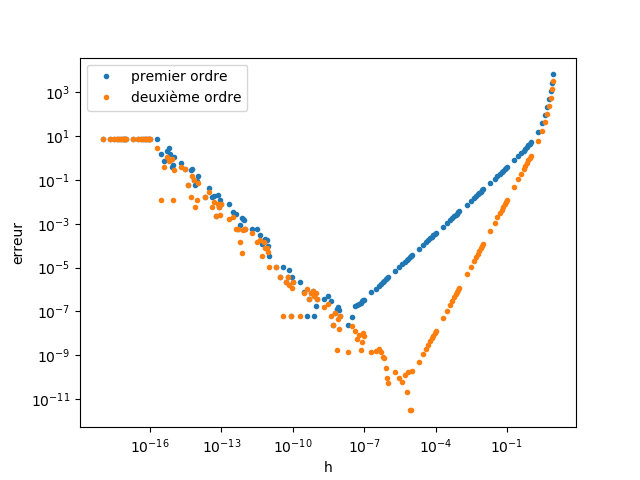

In [1]:
from IPython.display import Image
Image("./img/erreur_derivee.png")

On a en fait (pour le premier ordre) :  
$\dfrac{f(x+h)\varepsilon_{1} - f(x)\varepsilon_{2}}{h} = f'(x) + \dfrac{h}{2}\times f''(x) + \dfrac{\varepsilon_{1}-\varepsilon_{1}}{h} + o(h)$  
Où $\varepsilon_{1}$ et $\varepsilon_{2}$ sont les erreurs d'arrondies dans le stockage des valeurs, en négligeant les termes en $\dfrac{\varepsilon_i\times(f(x+h)-f(x))}{h}$  
et $|\dfrac{\varepsilon_{1}-\varepsilon_{1}}{h}| \leq 2\times\varepsilon^*$  
où $\varepsilon^* = 2^{64} $ pour un ordinateur en 64 bits  
On veut donc choisir h afin de minimiser l'erreur maximale : $e(h) = \dfrac{h}{2}\times |f''(x)| + \dfrac{2\times\varepsilon^*}{h}\times |f(x)|$  (sous réserve de pouvoir négliger le o(h) pour les valeurs de h avec lesquelles on travaille)  
$e'(h) = 0 \Leftrightarrow h = 2\times\sqrt{\varepsilon^*\times |\dfrac{f(x)}{f''(x)}}|$

Par un raisonnement analogue, pour le deuxième ordre (qui réduit l'erreur) il faudrait choisir :  
$h = (\dfrac{2*\varepsilon^*\times f(x)}{f^{(3)}(x)})^{\frac{1}{4}}$  
Le problème est qu'il faudrait alors connaître $f^{(3)}(x)$ or c'est justement les dérivés que nous cherchons à approcher.  
Notre solution (qui ne fonctionnera certes par pour n'importe quelle fonction) est d'approximer $f^{(3)}(x)$ avec un $h$ arbitraire (par exemple $10^{-5}$) afin de trouver un $h$ pour faire une meilleure approximation de $f'(x)$

## Différentes version de l'algorithme de dérivation

**Version 1 : Basique**

In [ ]:
def derive(f, axis, x0, y0):
    if axis == 'y':
        return (f(x0,y0+10**-4)-f(x0,y0))/(10**-4)
    if axis == 'x':
        return (f(x0+10**-4,y0)-f(x0,y0))/(10**-4)

**Version 2 : Utilisation d'un schéma amélioré**

In [ ]:
def derive_amelioree(f, axis, x0, y0):
    def d1(f,a,h):
        """dérivée de f avec un schéma d'ordre 1"""
        return (f(a+h) - f(a))/h

    def d2(f,a,h):
        """dérivée de f avec un schéma d'ordre 2"""
        return (f(a+h)-f(a-h))/(2*h)
    def d(f,a):
        pass
    if axis == 'y':
        return d2(lambda y : f(x0,y),y0,10**(-4))
    if axis == 'x':
        return d2(lambda x : f(x,y0),x0,10**(-4))